# SVM Tree Worksheet

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Loading data

Load Pima diabetes dataset and split data, with test size being 25% and validation 20%.

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv (url, names=names)

invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

# columns we will use to make predictions with (features!) feel free to play around with these
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

# column that we want to predict
y_col = 'class'

# 80-20 train-test split of datset
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=.25, random_state=0)

# further split X and y of training nto training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=0)

## Creating Model

Create a model with sklearn's SVC and a high gamma value

In [14]:
svm = SVC(gamma=1000000, C=1.0).fit(X_train, y_train)

Print accuracy of training and validation data

In [15]:
y_train_pred = svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  67.79661016949152


Create a model with sklearn's SVC and a low gamma value

In [19]:
svm_2 = SVC(gamma=0.00001, C=1.0).fit(X_train,y_train)

Print accuracy of training and validation data

In [17]:
y_train_pred_2 = svm_2.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred_2)*100)
y_val_pred_2=svm_2.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred_2)*100)

Training Accuracy is  86.38297872340426
Validation Accuracy is  76.27118644067797


Explain the accuracy results below. 

The higher the gamma, the higher the training accuracy and the lower the validation accuracy. This is due to higher gamma values overfitting the training data.

## Metrics

Print the confusion matrices (both numeric and visualized)

Confusion Matrix (High Gamma):
[[40  0]
 [19  0]]


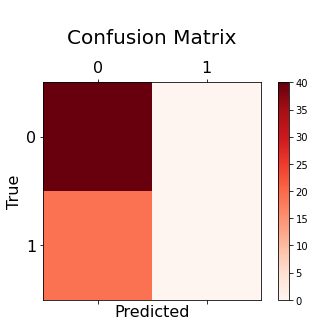

Confusion Matrix (Low Gamma):
[[39  1]
 [13  6]]


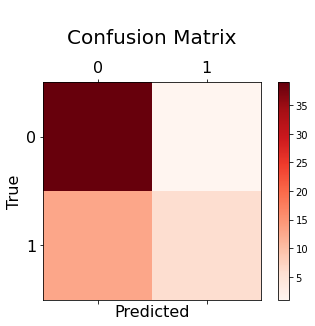

In [25]:
## Confusion matrices

print('Confusion Matrix (High Gamma):')
labels = [0,1]
cm = metrics.confusion_matrix(y_val, y_val_pred, labels)
print(cm)

def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()
  
plot_cmatrix(cm,labels)

print ('Confusion Matrix (Low Gamma):')
cm_2 = metrics.confusion_matrix(y_val, y_val_pred_2, labels)
print(cm_2)
plot_cmatrix(cm_2, labels)